In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (20,5)

In [2]:
data= pd.read_csv('data/news_dataset_v1.csv')
data.columns=['id','file_name','category','content']

In [3]:
data

,id,file_name,category,content
0,0,001.txt,business,Ad sales boost Time Warner profit\n\nQuarterly...
1,1,002.txt,business,Dollar gains on Greenspan speech\n\nThe dollar...
2,2,003.txt,business,Yukos unit buyer faces loan claim\n\nThe owner...
3,3,004.txt,business,High fuel prices hit BA's profits\n\nBritish A...
4,4,005.txt,business,Pernod takeover talk lifts Domecq\n\nShares in...
...,...,...,...,...
2220,2220,397.txt,tech,BT program to beat dialler scams\n\nBT is intr...
2221,2221,398.txt,tech,Spam e-mails tempt net shoppers\n\nComputer us...
2222,2222,399.txt,tech,Be careful how you code\n\nA new European dire...
2223,2223,400.txt,tech,US cyber security chief resigns\n\nThe man mak...


In [4]:
data.describe()

,id
count,2225.000000
mean,1112.000000
std,642.446496
min,0.000000
25%,556.000000
50%,1112.000000
75%,1668.000000
max,2224.000000


In [5]:
data.isna().sum()

id           0
file_name    0
category     0
content      0
dtype: int64

In [6]:
data.dtypes

id            int64
file_name    object
category     object
content      object
dtype: object

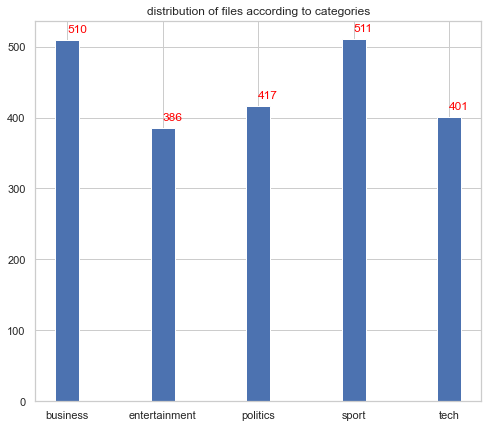

In [7]:
gb= data.groupby('category')
groups= gb.count()['content'].index
val= gb.count()['content'].values
fig,ax= plt.subplots(figsize=(8,7))
plt.title('distribution of files according to categories')
ax.bar(x= groups,height=val,width=0.25)
for i in range(len(val)):
    ax.text(i,val[i]+10,str(val[i]),color='red')

In [8]:
data['file_length']= data['content'].apply(lambda x: len(x))

Text(1.0, 1.0, 'Outlier detection')

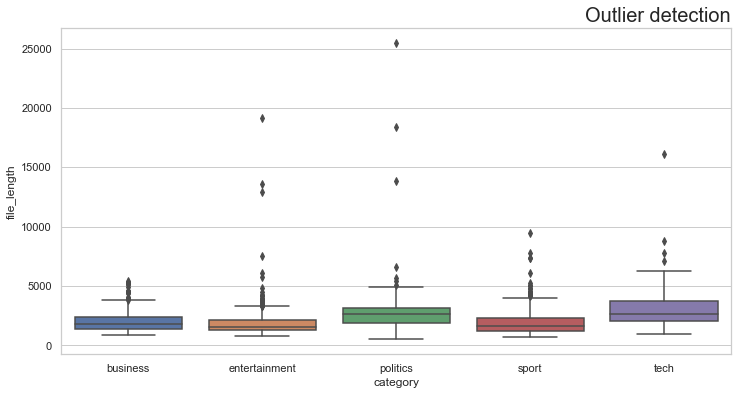

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(x='category',y='file_length',data= data)
plt.title('Outlier detection',fontdict={'fontsize':20},loc='right')

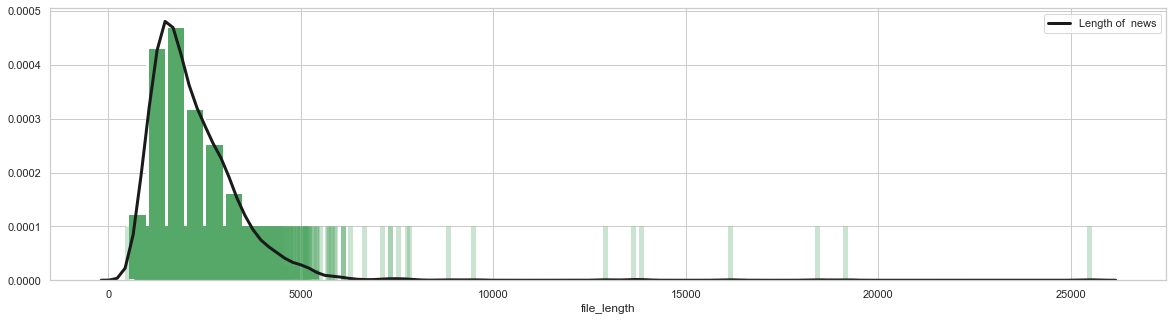

In [10]:
#we definately has a bill gate over here
sns.distplot(data['file_length'],rug=True, 
             kde_kws={"color": "k", "lw": 3, "label": "Length of  news"},
             hist_kws={"linewidth": 3,"alpha": 1, "color": "g"},
             rug_kws={"color": "g", "alpha":0.3, "linewidth": 5, "height":0.2 })


In [11]:
data2= data.query('file_length<10000').copy()

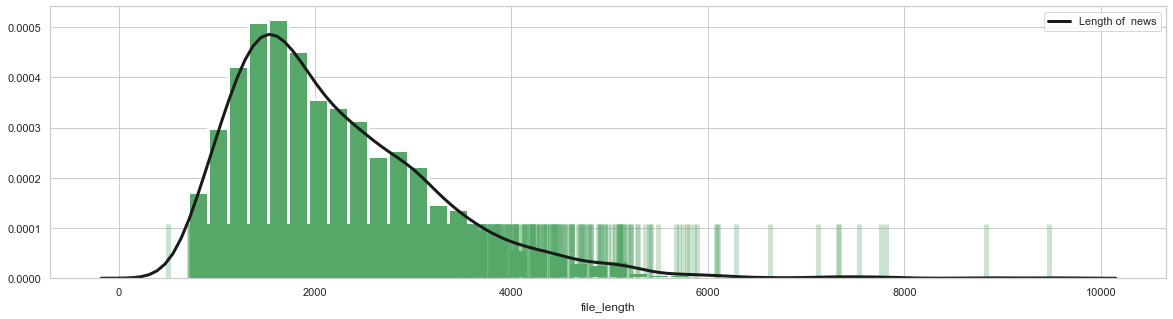

In [12]:
sns.distplot(data2['file_length'],rug=True, 
             kde_kws={"color": "k", "lw": 3, "label": "Length of  news"},
             hist_kws={"linewidth": 3,"alpha": 1, "color": "g"},
             rug_kws={"color": "g", "alpha":0.3, "linewidth": 5, "height":0.2 })

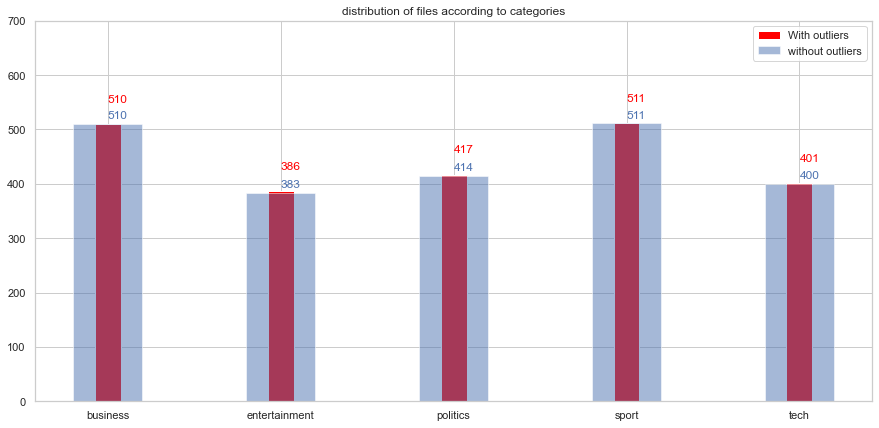

In [13]:
import numpy as np
gb= data.groupby('category')
groups= gb.count()['content'].index
val= gb.count()['content'].values
fig,ax= plt.subplots(figsize=(15,7))
plt.title('distribution of files according to categories')
ax.bar(x= groups,height=val,width=0.15,alpha=1,color='red')
for i in range(len(val)):
    ax.text(i,val[i]+40,str(val[i]),color='red')
    
gb2= data2.groupby('category')
val= gb2.count()['content'].values


ax.bar(x= groups,height=val,width=0.40,alpha=0.5,color='b')
for i in range(len(val)):
    ax.text(i,val[i]+10,str(val[i]),color='b')
plt.yticks(np.arange(0,800,step=100))
plt.legend(['With outliers','without outliers'])
plt.show()

##  Data is reduced from " Entertainment " and " politics " category

In [14]:
data

,id,file_name,category,content,file_length
0,0,001.txt,business,Ad sales boost Time Warner profit\n\nQuarterly...,2560
1,1,002.txt,business,Dollar gains on Greenspan speech\n\nThe dollar...,2252
2,2,003.txt,business,Yukos unit buyer faces loan claim\n\nThe owner...,1552
3,3,004.txt,business,High fuel prices hit BA's profits\n\nBritish A...,2412
4,4,005.txt,business,Pernod takeover talk lifts Domecq\n\nShares in...,1570
...,...,...,...,...,...
2220,2220,397.txt,tech,BT program to beat dialler scams\n\nBT is intr...,2519
2221,2221,398.txt,tech,Spam e-mails tempt net shoppers\n\nComputer us...,2285
2222,2222,399.txt,tech,Be careful how you code\n\nA new European dire...,6282
2223,2223,400.txt,tech,US cyber security chief resigns\n\nThe man mak...,2316


In [15]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['category2']= le.fit_transform(data['category'])


In [30]:
fig= px.scatter(data_frame= data,
                x= 'id',
                y= 'file_length',
                color='category',
            
               )
fig.layout={'yaxis_title':'Length of tweet',
           'xaxis_title':'categories',
           'title':'Length of news from all categories'
           }
fig.update_layout(
    legend={
        'orientation':'h',
        'yanchor':"bottom",
        'y':1.02,
        'xanchor':"right",
        'x':1},
        
#         xaxis = {
#             'tickmode':'linear',
#             'tick0':200,#intitial
#             'dtick':400 # space
#         }
         xaxis={
             'tickmode':'array',
             'tickvals':np.linspace(200,2000,5),
             'ticktext':['business','entertainment','politics','sport','tech']
         }
)


fig.show()

In [22]:
data['category'].values

array(['business', 'business', 'business', ..., 'tech', 'tech', 'tech'],
      dtype=object)

array([ 200.,  800., 1400., 2000.])